# Employee Attrition Prediction¶  
**Fifth Notebook: Translating Model Insights into Actionable Business Recommendations**  

This notebook builds upon the previous feature engineering and classification analyses, with the goal of **leveraging predictive models to generate actionable insights for the organization**.  

The objectives of this notebook are the following:

- Synthesize predictive model outputs, feature importances, and metrics from classification models.  
- Identify the key factors that influence employee attrition across different archetypes, career trajectories, and organizational contexts.  
- Translate data-driven insights into actionable recommendations for retention, engagement, and workforce planning.  
- Ensure that the findings are both interpretable and operationally relevant for HR and business leaders.  

By completing these steps, the organization will be equipped with **clear, evidence-based guidance** to support employee retention and strategic workforce decisions.  

**Author:** J-F Jutras  
**Date:** January 2026  
**Dataset:** HR Analytics Case Study — Kaggle  


## 5.1-Data Loading

In [33]:
import pandas as pd
import pickle

#Load final dataset from Kaggle input
final_dataset_path = "/kaggle/input/employeeattritiondataset/final_integrated_hr_dataset.pkl"
with open(final_dataset_path, "rb") as f:
    df = pickle.load(f)

#Clone the public GitHub repository "jfj-utils" into the current Kaggle working directory.
#This downloads all files and folders from the repo so they can be used in the notebook.
!rm -rf /kaggle/working/jfj-utils
!git clone https://github.com/jfjutras07/jfj-utils.git

#Add the cloned repository to the Python path so Python can import modules from it
import sys
sys.path.append("/kaggle/working/jfj-utils")

Cloning into 'jfj-utils'...
remote: Enumerating objects: 3435, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 3435 (delta 186), reused 109 (delta 109), pack-reused 3226 (from 4)
Receiving objects: 100% (3435/3435), 1.14 MiB | 2.12 MiB/s, done.
Resolving deltas: 100% (2263/2263), done.


## 5.2-Direct Drivers, Promotions and Systemic Triggers

To truly understand employee turnover, we must look at it through two different lenses. We use Logistic Regression to identify our Direct Drivers, which are the clear and individual factors like age or salary that consistently influence the risk of departure across the entire company. This model essentially provides the global map of what matters most. 

In parallel, we leverage LightGBM to uncover Systemic Triggers, those complex and hidden combinations of events where one factor amplifies another. A long commute, for instance, might only become a breaking point for an employee when it is paired with a lack of recent promotion. 

By combining the statistical transparency of the first with the predictive depth of the second, we move beyond simple observations to reach actionable organizational intelligence.

### Direct Drivers (Why?)

The logistic regression reveals a workforce caught between two opposing forces. On one side, the primary drivers of departure are centered around **individual mobility and career stability**, with Single employees and the Workhorse Elite archetype showing the highest vulnerability.

This suggests that the most productive talents are the most likely to leave when they feel over-burdened or when their career has hit a plateau, a fact further reinforced by **Stagnation and Business Travel** acting as risk accelerators. On the other side, the company possesses strong "retention anchors" through Manager Stability and Age, which, alongside high Job and Environment Satisfaction, serve as the main defensive barriers against turnover.

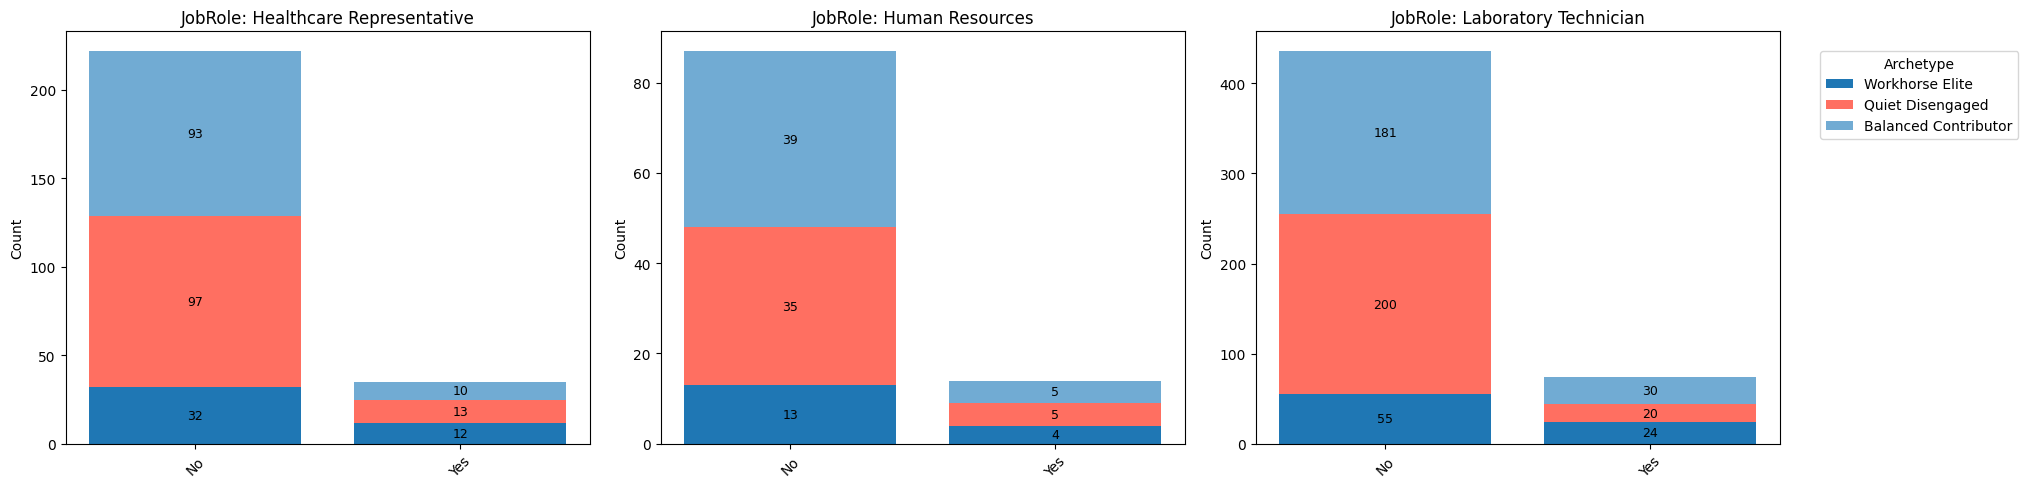

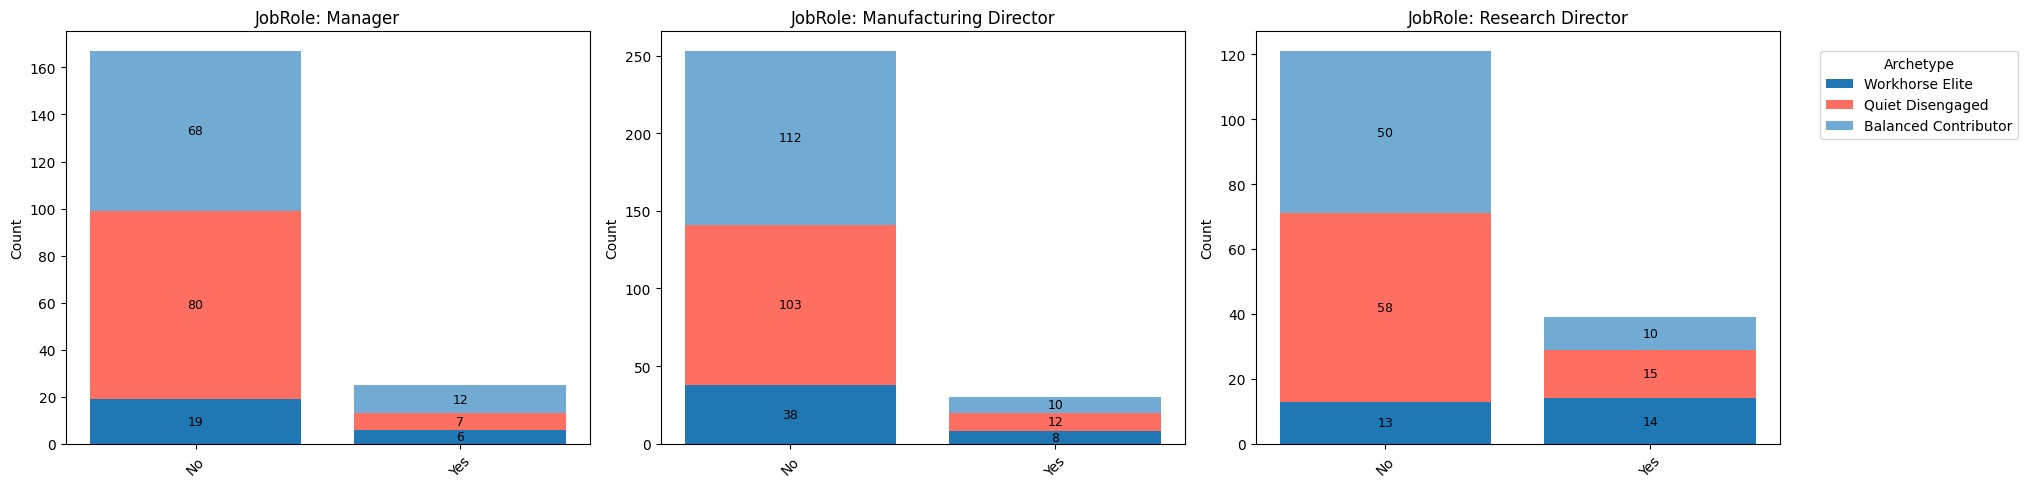

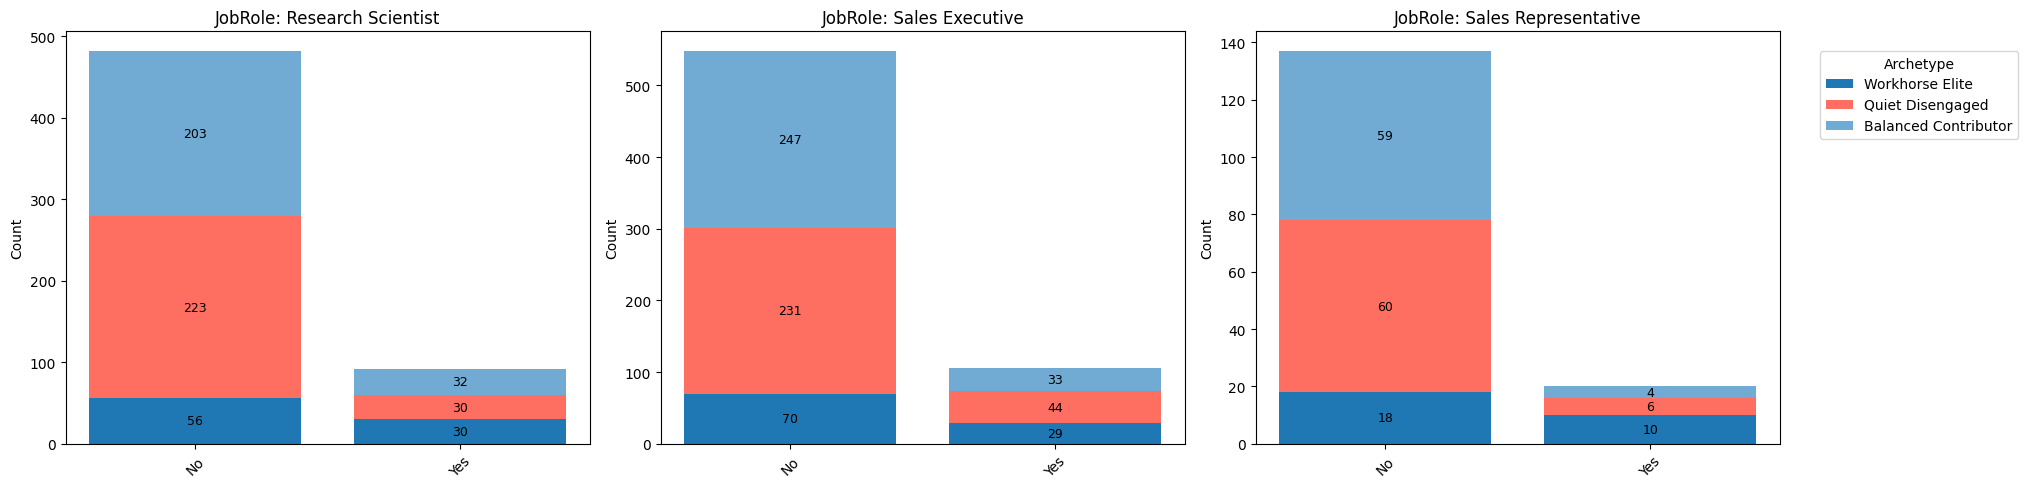

In [34]:
from visualization.explore_discrete_multivariate import plot_stacked_grid
plot_stacked_grid(df, 'Archetype', ['JobRole', 'Attrition'], n_rows = 1, n_cols = 3)

Across JobRoles, Archetype remains a strong and consistent attrition signal, confirming its robustness beyond departments.

- **Workhorse Elite** are systematically overrepresented among leavers in most roles (notably Research Director, Research Scientist, Sales Representative), indicating role-specific burnout risk.

- **Balanced Contributors** dominate the stay population but decline sharply among leavers, reinforcing their role as a retention anchor.

- **Sales roles** stand out, especially Sales Representatives, where attrition is heavily skewed toward exhausted high performers rather than disengaged profiles.

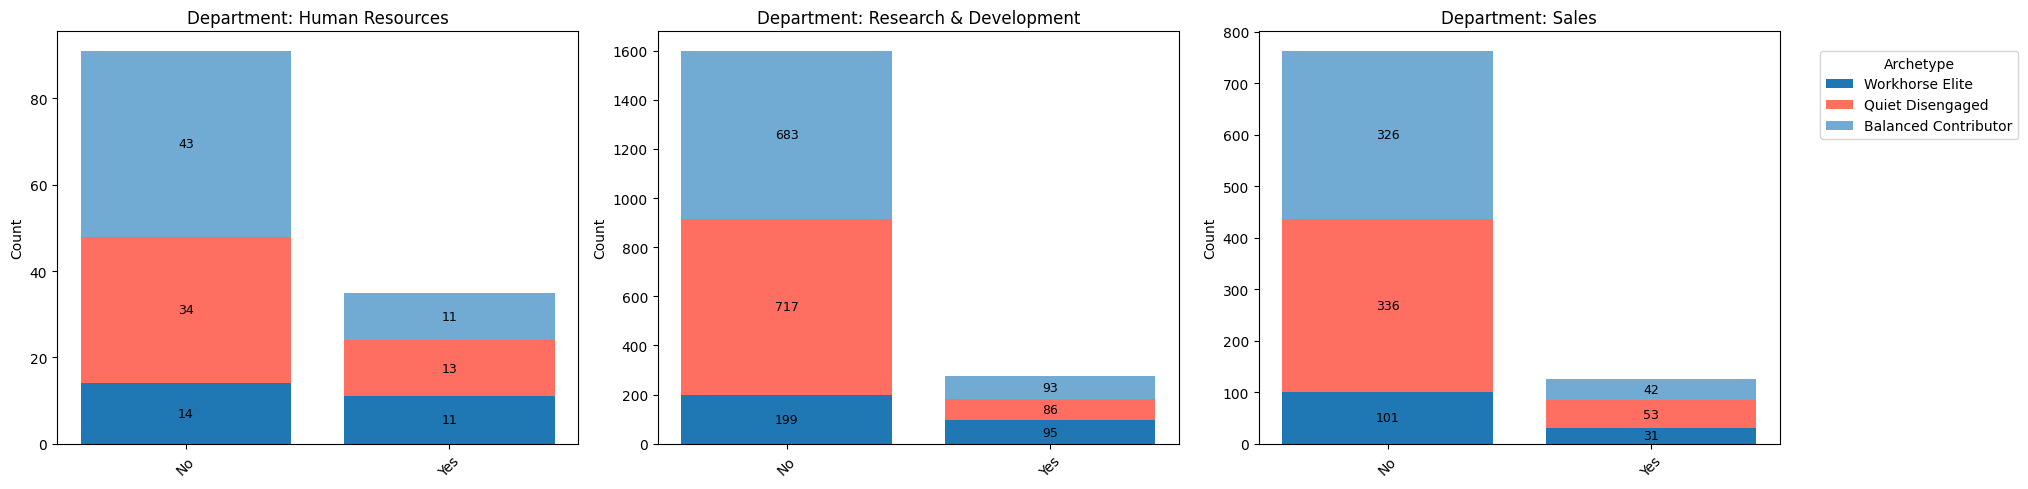

In [35]:
from visualization.explore_discrete_multivariate import plot_stacked_grid
plot_stacked_grid(df, 'Archetype', ['Department', 'Attrition'], n_rows = 1, n_cols = 3)

**Attrition patterns are consistent across departments**, with Archetype showing strong discriminative power.
- **Workhorse Elite** are systematically overrepresented among leavers, especially in R&D and HR, suggesting burnout risk.
- **Balanced Contributors** dominate the stay population and drop sharply among leavers, acting as a retention buffer.
- **Sales differs structurally**, with high attrition driven by both Workhorse Elite and persistently Quiet Disengaged profiles.


### Promotion and Performance Disconnect

**Performance, Engagement and Stagnation by Archetype**

| Archetype            | Mean Performance | Mean Job Involvement | Mean Salary Hike (%) | Mean Stagnation |
|:---------------------|-----------------:|---------------------:|---------------------:|---------------------------------------------:|
| Workhorse Elite      | 3.17             | 2.70                 | 15.14                | 2.11                                         |
| Quiet Disengaged     | 3.15             | 2.72                 | 15.26                | 2.21                                         |
| Balanced Contributor | 3.14             | 2.75                 | 15.14                | 2.29                                         |


One of the most striking findings is the near-complete disconnect between perceived performance, job involvement, and traditional reward levers. PerformanceRating shows no meaningful correlation with either JobInvolvement or PercentSalaryHike, exposing a structural weakness in the talent management system.

This suggests that performance evaluations may be overly subjective, or that compensation policies are poorly aligned with merit. As a result, salary increases fail to function as an effective retention mechanism, while highly engaged employees may experience growing frustration driven by perceived unfairness or career stagnation rather than absolute compensation levels.

### Systemic Triggers (Who?)

Direct vs Systemic distinction is critical: Direct drivers (archetypes, department patterns) describe who leaves, while systemic drivers explain why pressure accumulates. Systemic triggers create attrition pressure, but archetypes determine vulnerability, shaping how employees respond to that pressure.

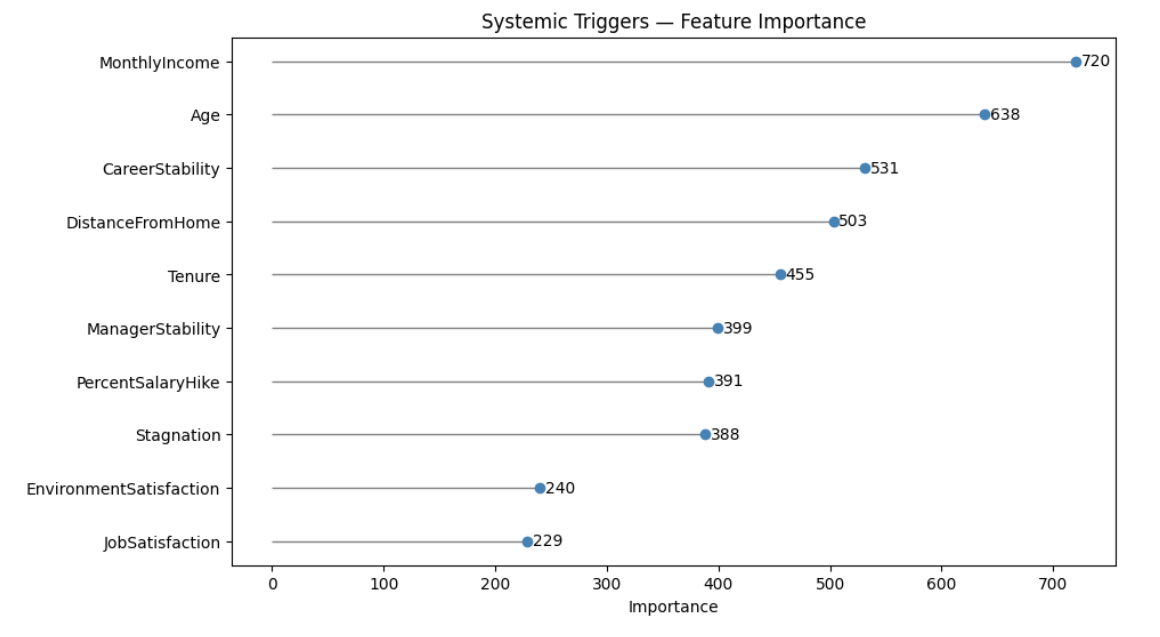

- **Income and career stability** act as foundational constraints: insufficient reward for sustained effort and low career inertia significantly increase exit risk.

- **Tenure, Manager stability, PercentSalaryHike, Stagnation, and distance from home** act as catalysts, accelerating attrition by breaking retention buffers or amplifying daily friction rather than causing disengagement directly.

**SHAP Analysis**

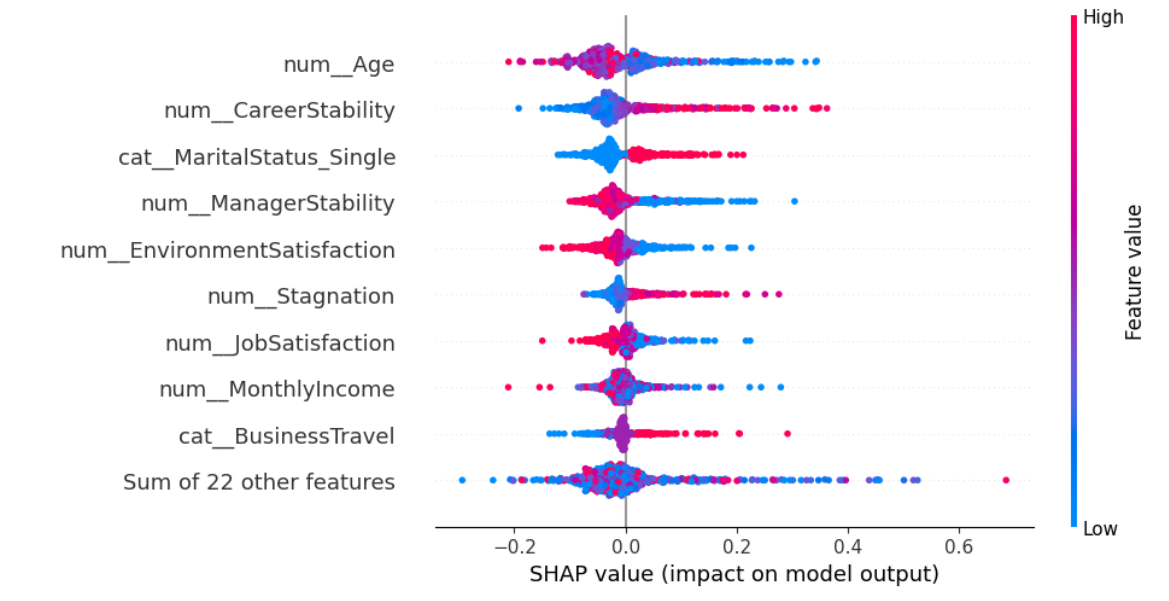

- **Age** (top SHAP): youngest employees are consistently the most at-risk, aligning with regression results and archetype trends (Workhorse Elite / early-career mobility).

- **Career Stability**: low stability (“job hopping”) strongly increases attrition, confirming systemic pressure as a foundational constraint.

- **Marital Status (Single)**: being single is a significant social predictor, linking demographic factors with attrition patterns across archetypes.

- **Manager Stability**: weak managerial relationships act as catalysts, especially for Balanced Contributors, breaking retention buffers.

- **Environment & Job Satisfaction**: internal satisfaction contributes modestly but does not override systemic pressures; aligns with low feature importance in Random Forest.

- **Stagnation & Tenure**: lack of promotion and short tenure amplify risk, reinforcing the pressure mechanism observed in direct triggers and systemic triggers.

- **Monthly Income & Business Travel**: income partially protects but cannot offset high-pressure archetypes; frequent travel accelerates attrition in vulnerable employees.

- **Distance from Home & Work-Life Balance**: logistical and personal constraints act as secondary catalysts, modifying the timing and likelihood of exits.

## 5.3-From Predictive Signals to Organizational Intelligence

**Without direct access to internal policies, project and risk portfolios, strategic planning or detailed financial metrics, it is impossible to fully leverage the predictive potential of this section through scenario planning.**

Nevertheless, by synthesizing Direct Drivers and Systemic Triggers, we can deliver a high-level evaluation and identify where interventions will have the greatest impact. This approach bridges the gap between statistical probabilities and operational realities, highlighting the specific points where organizational pressures intersect with individual vulnerabilities.

### Getting HR Back on Track

No matter what strategies we implement across the organization, a significant portion of HR talent is at risk of leaving. This is not just about the department itself: HR plays a central role in coordinating and monitoring all retention initiatives across the company. Without a stable HR team, executing and following up on turnover reduction projects will be virtually impossible, making their retention an absolute priority before addressing other areas.

**What is going on in the HR department?**

- **Senior talent at risk**: In HR, it is the most experienced and senior staff who are leaving, taking with them critical leadership and expertise.

- **Retention beyond early tenure is a challenge**: Attrition affects even long-tenured employees, showing that keeping talent beyond initial integration requires more than standard measures.

- **Compensation alone is not enough**: Average salary hikes (~14–15%) fail to prevent departures, proving that pay is only part of the retention story.

- **High-risk, highly engaged employees**: The Workhorse Elite (the department’s most dedicated performers—are leaving at the highest rates (~30%)), suggesting workload or burnout pressures.

- **Satisfaction is only part of the picture**: Even satisfied employees are leaving, pointing to organizational and external pressures.

- **Distance and training matter**: Longer commutes and fewer training opportunities contribute to a sense of disconnection, amplifying attrition risk.

**Rescue Plan: Priority Stabilization of HR**

| Horizon              | Initiative                | Concrete Action                                                                                                           | Target Objective                                                                                  |
|---------------------|-------------------------|--------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| Immediate            | Check-in & Listening    | - HR Watch Committee: Weekly meeting focused solely on team well-being and tracking Rescue Plan progress.               | Identify individual breaking points before departures occur.                                     |
| Short Term           | Workload Reduction      | - "Staffing Only" Prioritization: Reduce non-essential transversal projects (culture initiatives, new tools). <br> - Hire external consultants and/or redirect internal analysts to support workload and address 1–2 critical processes causing internal complaints. <br> - Communicate to leadership that stabilization will not happen overnight and implement quick wins to improve immediate conditions. | Reduce overwork of the "Workhorse Elite" and resolve urgent internal pain points.               |
| Short-Medium Term    | Knowledge Securing      | - Pairing Plan: Allocate dedicated time for senior staff to mentor new hires. <br> - Transfer critical knowledge systematically. | Prevent loss of critical institutional knowledge during departures and reassure new employees.  |
| Ongoing              | Logistical Adjustment   | - Proximity Flexibility: Offer telework or flexible hours as a priority to employees with long commutes.               | Mitigate fatigue from commuting, a key factor in attrition.                                      |


### Quick Wins and Operational Stabilization

In parallel with the critical rescue plan for the HR department, the organization must deploy a series of immediate actions across all departments. The objective here is not to transform the corporate culture or overhaul complex systems, but to act as a "circuit breaker" on the most frequent resignation triggers identified by our models (Distance, perceived Stagnation, Managerial instability).

**Quick Wins and Operational Stabilization (Immediate Impact)**

| Horizon          | Initiative                  | Concrete Action                                                                                           | Lever & Risk Mitigation                                                      |
|-----------------|----------------------------|----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| Immediate        | Logistical Shield           | Grant telework or flexible hours to employees with long commutes.  | Reduces the impact of DistanceFromHome.                                     |
| Immediate        | Time Sanctuary              | Suspend non-critical transversal projects and establish "focus work" blocks without meetings. | Relieves pressure on the Workhorse Elite archetype.                         |
| Immediate        | Manager Stability & Safety Valve | Halt manager rotations in high-attrition teams unless internal feedback indicates toxic leadership (create a confidential "red flag" channel for employees to report managerial friction directly to the core HR team). | Strengthens Manager Stability while preventing “Bully” traps and ensures toxic behaviors are addressed. |
| Immediate        | Targeted Recognition        | Conduct "Flash" one-on-one meetings between leadership and high performers to validate their contribution. | Offsets the lack of Salary Hike through moral support.                       |
| Short-Medium Term| Operational Support & Dashboard   | Prioritize business analysts and IT resources to spin off the classification project and create a dashboard with key indicators necessary for tracking HR stabilization and intervention outcomes. | Provides structured monitoring, ensures visibility on high-risk areas, and enables timely corrective actions. |


### Building a Resilient Organization

Once the immediate crisis is averted, the organization must address the root causes of attrition. This plan will be rolled out progressively, starting with the most critical departments and job roles (Sales, HR, and R&D). In cases where a company-wide deployment is neither possible nor preferable due to operational constraints or localized risks, interventions will be tailored and prioritized to ensure a smooth and stable transition.

**Medium & Long-Term Initiatives**

| Horizon      | Initiative                   | Concrete Action                                                                                                 | Lever & Risk Mitigation                                                      |
|-------------|------------------------------|----------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| Short-Medium Term | Workload Balancing Strategy  | Cap overtime for Workhorse Elite and tighten monitoring for Quiet Disengaged. Execute through statutory status meetings and promote teamwork (when possible). | Reduces burnout risk and prevents early attrition among high performers, enabling better performance and stability across the rest of the organization.   |
| Medium Term | Performance & Bonus Overhaul | Shift from subjective manager ratings to objective criteria. Align bonus allocations with these metrics to restore equity and trust. | Reinforces fairness, improves engagement, and restores confidence in reward systems. |
| Long Term   | HR Attractiveness & Retention | Create a specific value proposition for HR staff (career paths, specialized training) to permanently stabilize the department. | Strengthens retention, supports succession planning, and secures institutional knowledge. |
| Long Term   | Modern Work Framework        | Formalize telework policies and promote flexibility, specifically targeting roles sensitive to commute distance. | Improves work-life balance, reduces attrition related to commuting, and supports engagement. |
| Long Term   | Sustainable Business Travel  | Introduce mandatory breaks after travel or financial incentives based on travel intensity to mitigate fatigue. | Reduces stress and prevents burnout from excessive business travel.        |
| Long Term   | Integrated Satisfaction Metrics | Align workplace satisfaction measurement systems with specific retention projects to track the real-world impact of interventions. | Provides actionable insights to monitor effectiveness of retention initiatives. |


The transition from a reactive to a proactive retention model requires a dual commitment: stabilizing the present while re-engineering the future. By addressing immediate "circuit breakers" like commuting fatigue and managerial instability, the organization can stop the current talent drain in critical departments like HR and Sales.

However, long-term resilience will only be achieved by building an efficient and structured HR department focused on best practices, whether in staffing, attractiveness, and retention, or in organizational change management and skills development. By realigning the performance-reward ecosystem and protecting the employees from systemic burnout, this data-driven roadmap transforms attrition from an unpredictable operational risk into a manageable strategic lever. Ultimately, it ensures that the company’s most valuable asset (its people) is supported by a robust organizational framework that values both high performance and sustainable engagement.

## 5.4-Limitations

| Limitation                        | Description                                                                                                                           |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| Static Stagnation Indicators      | The "Stagnation" variable only measures the time elapsed since the last promotion. It fails to capture the overall historical velocity of career progression, which is a powerful signal of high-potential talent. |
| "Ghost" Variables (Soft Skills)  | The dataset lacks data on the intrinsic quality of management (leadership style, toxicity) or team culture, which are often the true catalysts behind an employee's decision to leave. |
| Self-Fulfilling Prophecy Risk     | Profiling "Workhorse Elite" employees as high-risk could paradoxically harm their careers if management, fearing their departure, proactively restricts their opportunities or project assignments. |
| Lack of ROI Analysis              | Recommendations (such as the HR Rescue Plan or hiring consultants) are presented without a cost-benefit estimation, making budgetary validation challenging for executive leadership. |
| Static Nature of the Dataset      | The analysis is a "snapshot" in time. It does not account for external economic cycles that radically shift employee priorities, such as the trade-off between job security and market opportunity. |
| Dynamic Career Events Missing     | The dataset doesn’t capture real-time career events like lateral moves, new responsibilities, or changes in manager, which can rapidly shift attrition risk. |
| External Market & Competitor Effects | Employee decisions to leave may be influenced by competitive offers, industry trends, or macroeconomic conditions (factors not included in the model). |
| Engagement & Sentiment Signals   | Variables like employee mood, engagement survey responses over time, or informal feedback loops are missing, limiting detection of early dissatisfaction. |
| Small Cohort Bias                 | Certain archetypes or roles (e.g., very senior HR leaders, niche technical roles) may be underrepresented, making predictions less reliable for these groups. |
| Measurement Noise                 | Variables like “JobSatisfaction” or “EnvironmentSatisfaction” are self-reported and subject to bias, mood, or temporary fluctuations, which can distort signal strength. |
| Legal & Ethical Constraints       | Even if predictive signals are strong, many cannot be directly acted upon (marital status, age, gender), limiting operationalization of some findings. |
| Temporal Drift                    | The classification model may degrade over time if organizational policies, culture, or workforce composition change, requiring regular retraining and recalibration. |
